# Homework 6
## Adam Sanchez 
### MATH 4650

______________________________________________________________________________________________________________________

### 1)

First lets note $h = \frac{b-a}{3} \implies 3h = b-a \implies 3h = b$ 

so 
$x_0 = 0$, $x_1=h$, $x_2= 3h$ 

Therefore we can use our interpolating polynomal $p(x)$ from our last homework. Where $$p(x) = f(0)\ell_0(x) + f(h)\ell_1(x)+f(3h)\ell_2(x)$$

Now inorder to calculate our integral lets just evualte the antiderivative of $p$ at our endpoint: 

$$P(x) = f(0)L_0(x) + f(h)L_1(x)+f(3h)L_2(x)$$ Where: 
$$L_0(x) =\frac{1}{3h^2}\left[\frac{x^3}{3}-2hx^2+3h^2x\right]$$
$$L_1(x) = -\frac{1}{2h^2}\left[\frac{x^3}{3}-\frac{3hx^2}{2}\right]$$
$$L_2(x) = \frac{1}{6h^2}\left[\frac{x^3}{3}-\frac{hx^2}{2}\right]$$

So our scheme is: 

$$I = P(b) - P(a)$$

To show that this works perfectly for qaudric lets explore $\int_{a}^{b} x^2+4x+2 \,dx$
We know this should be $14.6666666$ so lets see if thats what we get: 

In [60]:
a = 0 
b = 2
h = (b-a)/3

f = lambda x:  x**2+4*x+2

L1 = lambda x,h: (1/(3*h**2))*((x**3 / 3)-(2*h*x**2)+(3*h**2*x))
L2 = lambda x,h: (-1/(2*h**2))*((x**3 / 3)-(3*h*x**2)/2)
L3 = lambda x,h: (1/(6*h**2))*((x**3 / 3)-(h*x**2)/2)
def P (f,x, h): 
    return f(0)*L1(x,h)+f(h)*L2(x,h)+f(3*h)*L3(x,h)

#pa = f(0)*L1(a,h)+f(h)*L2(a,h)+f(3*h)*L3(a,h)
#pb = f(0)*L1(b,h)+f(h)*L2(b,h)+f(3*h)*L3(b,h)
#pb-pa

P(f,b,h) - P(f,a,h)

14.666666666666668

As we can see it works perfectly!

______________________________________________________________________________________________________________________

### 2)

In [101]:
import numpy as np
def myComposite (f,a,b,n):
    if n <2: 
        n=2
    n = int(n/2)
    supp = (b-a)/(3*n)
    nodes = np.arange(a, b+supp, step=supp)
    L1 = lambda x,h: (1/(3*h**2))*((x**3 / 3)-(2*h*x**2)+(3*h**2*x))
    L2 = lambda x,h: (-1/(2*h**2))*((x**3 / 3)-(3*h*x**2)/2)
    L3 = lambda x,h: (1/(6*h**2))*((x**3 / 3)-(h*x**2)/2)
    def P (f,x, h): 
        return f(0)*L1(x,h)+f(h)*L2(x,h)+f(3*h)*L3(x,h)
    I = 0
    for i in range((3*n)): 
        I += (P(f,nodes[i+1],supp)-P(f,nodes[i],supp))
    return (I)

def CompositeMidpoint( f, a, b, n ):
    h   = (b-a)/(n+1)  # this is \tilde{h} in the notes
    nodes = np.arange( a+h/2, b, step=h)
    return h*np.sum(f(nodes))

def CompositeTrapezoidal( f, a, b, n):
    nodes, h = np.linspace(a,b,n+1,retstep=True)
    y  = f(nodes)
    return h*( np.sum(y) - (y[0]+y[-1])/2) # y[-1] is last element; in Matlab, this is y(end)

def CompositeSimpson( f, a, b, n):
    n = int(n/2)*2  # Make it even
    nodes, h = np.linspace(a,b,n+1,retstep=True)
    y = f(nodes)
    return h/3*( y[0] + 2*np.sum(y[2:n:2]) + 4*np.sum(y[1:n:2]) + y[-1] )


/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


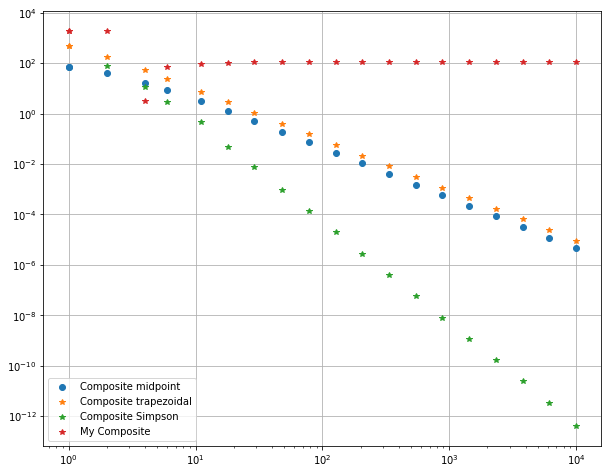

In [109]:
import matplotlib.pyplot as plt
import matplotlib as mpl

f = lambda x : np.exp(3*x)
F = lambda x : np.exp(3*x)/3  # dF/dx = f
a,b = -1,2
I   = F(b) - F(a)

nList = np.logspace(0,4,20).astype(int)
errMidpoint = []
errTrapezoidal = []
errSimpson = []
errMine = []
for n in nList:
    I_est = CompositeMidpoint( f, a, b, n)
    errMidpoint.append( abs(I_est - I))

    I_est = CompositeTrapezoidal( f, a, b, n)
    errTrapezoidal.append( abs(I_est-I))

    I_est = CompositeSimpson( f, a, b, n)
    errSimpson.append( abs(I_est-I))
    
    I_est = myComposite( f, a, b, n)
    errMine.append(abs(I_est-I))

plt.figure(figsize=(10,8)) 
plt.loglog( nList, errMidpoint,'o',label='Composite midpoint');
plt.loglog( nList, errTrapezoidal,'*',label='Composite trapezoidal');
plt.loglog( nList, errSimpson,'*',label='Composite Simpson');
plt.loglog( nList, errMine,'*',label='My Composite');
plt.grid()
plt.legend();

______________________________________________________________________________________________________________________

### 3)

So I got kind of confused on how to include the n=4096 part. So I just did 10 rows. Im sure thats not correct but I hope I can get some credit. 

But that being said I do think there is an advantage using the composite trapezoidal rule in Romberg integration. With composite trapezoidal we know what the errors look ike so we can cancel them out using repeated Richerdson extrapolation and composite trapezoidal only involves even points so repeated Richerdson extrapolation has a nice form.  

In [110]:
def RombergAppliedToMidpoint(f,a,b,nRows):
    n = 2
    table = []
    for i in range(nRows):
        I = CompositeMidpoint(f,a,b,n)
        newRow = [I]
        if i > 0:
            oldRow = table[-1]
        for j in range(i):
            qj = 4**(j+1)
            newRow.append(  (qj*newRow[-1] - oldRow[j])/( qj-1) )
        table.append(newRow)
        n *= 2
    return table

In [117]:
f = lambda x: np.cos(x)
F = lambda x : np.sin(x)

a = 0
b = 50

I   = F(b) - F(a)

table = RombergAppliedToMidpoint(f,a,b, 10)
for row in table:
    for entry in row:
        print("{:.2e}  ".format(abs(entry-I)),end="") # suppress new line
    print("") # new line

2.20e+00  
1.63e+00  2.91e+00  
1.79e+00  2.92e+00  3.31e+00  
1.25e-01  4.28e-01  6.52e-01  7.14e-01  
2.69e-02  5.96e-03  2.22e-02  3.29e-02  3.58e-02  
6.58e-03  1.86e-04  1.99e-04  1.50e-04  2.79e-04  3.14e-04  
1.65e-03  5.39e-06  1.81e-05  1.52e-05  1.59e-05  1.62e-05  1.63e-05  
4.14e-04  2.47e-06  2.28e-06  2.02e-06  1.97e-06  1.96e-06  1.95e-06  1.95e-06  
1.04e-04  4.24e-07  2.88e-07  2.56e-07  2.49e-07  2.48e-07  2.47e-07  2.47e-07  2.47e-07  
2.60e-05  6.04e-08  3.61e-08  3.21e-08  3.13e-08  3.11e-08  3.10e-08  3.10e-08  3.10e-08  3.10e-08  


______________________________________________________________________________________________________________________

### 4)

a) 

So I know we want to get the sum into the same for as the composite trapezoidal rule but I cannot figure out how to do it. 

b)

/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


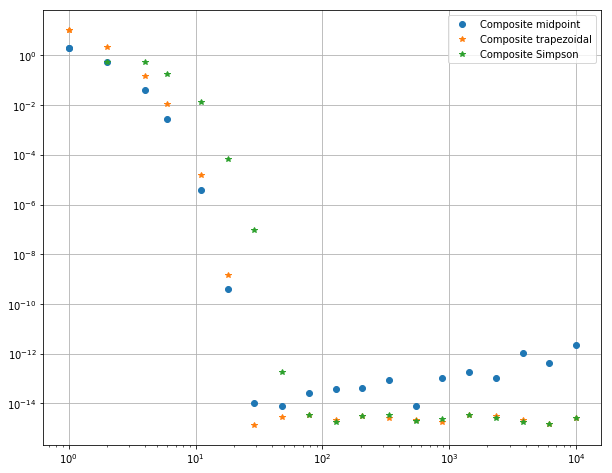

In [123]:
f = lambda x : np.exp(-x*1j)/(1+np.cos(x)/2)
a,b = -np.pi,np.pi
I   = (2 - (4/np.sqrt(3)))*2*np.pi

nList = np.logspace(0,4,20).astype(int)
errMidpoint = []
errTrapezoidal = []
errSimpson = []
for n in nList:
    I_est = CompositeMidpoint( f, a, b, n)
    errMidpoint.append( abs(np.real(I_est) - I))

    I_est = CompositeTrapezoidal( f, a, b, n)
    errTrapezoidal.append( abs(np.real(I_est) - I))

    I_est = CompositeSimpson( f, a, b, n)
    errSimpson.append( abs(np.real(I_est) - I))
plt.figure(figsize=(10,8)) 
plt.loglog( nList, errMidpoint,'o',label='Composite midpoint');
plt.loglog( nList, errTrapezoidal,'*',label='Composite trapezoidal');
plt.loglog( nList, errSimpson,'*',label='Composite Simpson');
plt.grid()
plt.legend();

c) 

It looks like there is very little advantage using a higher order rule, like Simpsons vs. Trapeoidal. I think this might be because f probably oscillates alot, and we know that Simpsons rule can struggle with highly oscillating functions. 